<a href="https://colab.research.google.com/github/vishalsahuu/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Data Collection and Preprocessing

In [297]:
# Importing dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#reading the csv files and converting to pandas dataframe
Rossmann_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Supervised ML - Regression/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Supervised ML - Regression/store.csv')

In [97]:
# First look at the sales data
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [98]:
# Info of the sales data
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are no null or missing values in this dataset.

In [99]:
# Having first look on the stores data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [100]:
# Info of the stores data
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are null values in this dataset and it is important to impute these missing values in order to get better results.

### Missing Data Handling

In [101]:
# Total null values 
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [102]:
# looking for null percentage in each column
null_columns = (store_df.isnull().sum()/len(store_df))*100
print(null_columns)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


Text(0.5, 0, 'Competition Distance Distribution Plot')

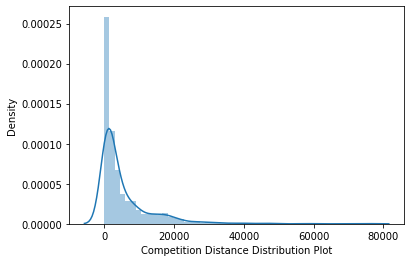

In [103]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

The distribution seems to be skewed to the right so imputing the missing values with the mean is a robust approach as it's not affected by the outliers.

In [104]:
# Imputing competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [105]:
# Filling the competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0

In [106]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mode()[0], inplace=True)
store_df['PromoInterval'].fillna(store_df['PromoInterval'].mode()[0], inplace=True)

In [107]:
#Final check for missing data
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Merging the two Datasets

In [108]:
# Merging the two datasets into one using a left join on store column
rossmann_store_df = pd.merge(Rossmann_df, store_df, on = 'Store', how = 'left')

In [109]:
# Check for duplicates in dataset
len(rossmann_store_df[rossmann_store_df.duplicated()])

0

There are no duplicates in the dataset

In [110]:
# A look on the merged dataset
rossmann_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### Changing the data types to the desired data types

In [111]:
# Changing all the float data types to int data types
rossmann_store_df['CompetitionOpenSinceMonth'] = rossmann_store_df['CompetitionOpenSinceMonth'].astype(int)
rossmann_store_df['CompetitionOpenSinceYear'] = rossmann_store_df['CompetitionOpenSinceYear'].astype(int)
rossmann_store_df['Promo2SinceWeek'] = rossmann_store_df['Promo2SinceWeek'].astype(int)
rossmann_store_df['Promo2SinceYear'] = rossmann_store_df['Promo2SinceYear'].astype(int)
# hanging format of date from object to datetime
rossmann_store_df['Date'] = pd.to_datetime(rossmann_store_df['Date'], format= '%Y-%m-%d')

### Extracting year and month from date

In [112]:
# create a column date
rossmann_store_df['Year'] = rossmann_store_df['Date'].dt.year
# create a column month
rossmann_store_df['Month'] = rossmann_store_df['Date'].dt.month

## Exploratory Data Analysis

In [113]:
# explore the first 5 rows
rossmann_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,2011,"Jan,Apr,Jul,Oct",2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,2011,"Jan,Apr,Jul,Oct",2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,2011,"Jan,Apr,Jul,Oct",2015,7


In [114]:
# Explore the last 5 rows
rossmann_store_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,0,2011,"Jan,Apr,Jul,Oct",2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9,2013,0,0,2011,"Jan,Apr,Jul,Oct",2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9,2013,0,0,2011,"Jan,Apr,Jul,Oct",2013,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9,2013,1,22,2012,"Mar,Jun,Sept,Dec",2013,1


In [115]:
# Description of the numerical data
rossmann_store_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5422.020804,7706.918259,20.0,710.0,2325.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,7.787777,2.778755,1.0,6.0,9.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,2010.060208,5.340757,1900.0,2008.0,2012.0,2013.0,2015.0


### Univariate Analysis

#### Sales

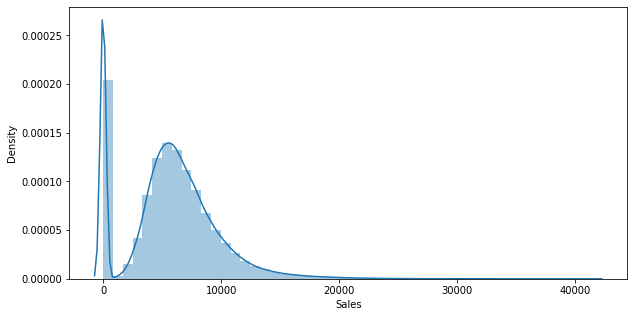

In [116]:
# Plotting the distribution of sales
plt.figure(figsize=(10,5))
sns.distplot(rossmann_store_df['Sales'])

Sales is **0** several times, it could be because of the closure of stores at the times of **holidays and weekends**.

And the distribution is  **negatively skewed** a bit.

#### Competetion Distance

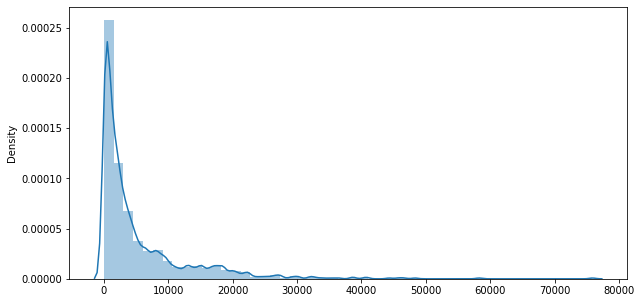

In [117]:
plt.figure(figsize=(10,5))
sns.distplot(x = rossmann_store_df['CompetitionDistance'],hist = True)

it is evident that most of the stores have their **competition** within **5km** range.

#### Promo

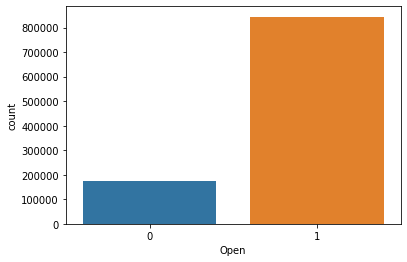

In [118]:
# A count plot for stores open
sns.countplot(rossmann_store_df['Open'])

Stores were opened most of the times. 

#### Competition Open Since Year

Text(0.5, 1.0, 'Distribution of Competetion year wise')

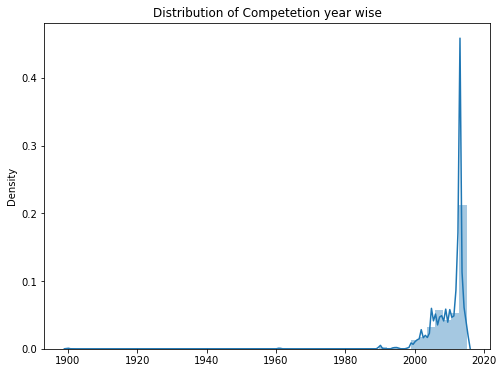

In [119]:
# Plotting Competetion distribution year wise
plt.figure(figsize=(8,6))
sns.distplot(x = rossmann_store_df['CompetitionOpenSinceYear'],hist = True)
plt.title('Distribution of Competetion year wise')

Competition **increased rapidly** after the year **2000**.

### Multivariate Analysis 

#### Monthly Sales

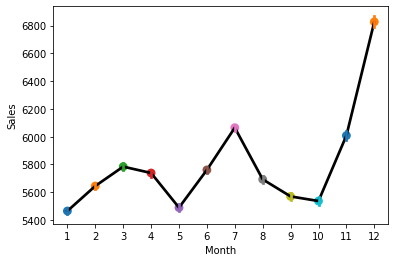

In [120]:
#make one plot for the line without points and errorbars
ax = sns.pointplot(x="Month", y="Sales", data=rossmann_store_df, markers="", join=True, ci=None, color="k")
#make one plot for the points without the connecting line
ax = sns.pointplot(x="Month", y="Sales", data=rossmann_store_df, palette=sns.color_palette())
plt.show()

It could be seen that the **sales** goes up around December, at times of **Christmas** and **New Years**.

#### Sales in a Week

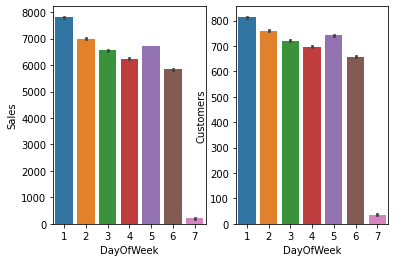

In [121]:
# Plotting Day of Week against sales and customers
plt.subplot(1,2,1)
sns.barplot(x="DayOfWeek", y="Sales", data=rossmann_store_df)
plt.subplot(1,2,2)
sns.barplot(x="DayOfWeek", y="Customers", data=rossmann_store_df)

Here we observe that Sales and Customers are both **very few** on **Sundays** as **most** of the stores are **closed** on **Sunday**.

Also, Sales on **Monday** is **highest** in the whole week. This might be due to the fact that stores are closed on Sundays.

#### Store type

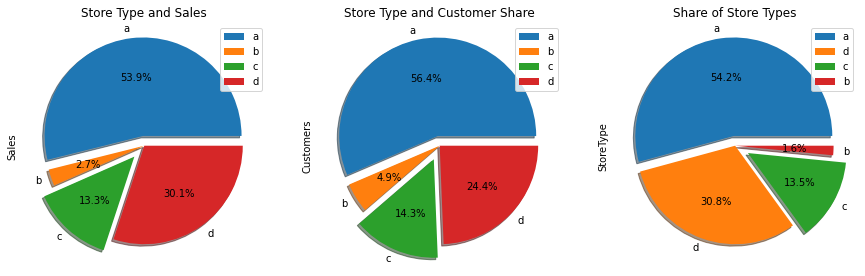

In [122]:
#let's explore store type a bit and it's influence on sales
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
rossmann_store_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, explode = (0.1, 0.0 , 0.15 , 0.0), autopct='%1.1f%%', shadow=True)
#customers and store type
plt.subplot(1,3,2)
rossmann_store_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Store Type and Customer Share', legend=True, explode = (0.1, 0.0 , 0.15 , 0.0), autopct='%1.1f%%', shadow=True)
#store types in all of the dataset
plt.subplot(1,3,3)
rossmann_store_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, explode = (0.1, 0.0 , 0.15 , 0.0), autopct='%1.1f%%', shadow=True)

Here we can easily see that the store type **a** has the **highest sales and customers** as its number is highest among all the store types. 

#### Assortment and Sales

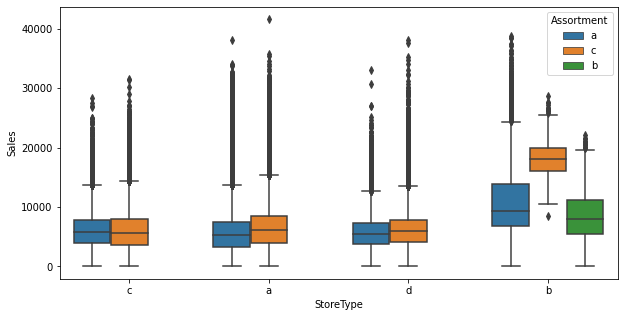

In [123]:
# Impact of Assortment on sales and storetype combined 
plt.figure(figsize=(10,5))
sns.boxplot(x='StoreType', y='Sales', data=rossmann_store_df ,hue="Assortment")

In this plot it can be observed that store type **b** has all kinds of assortments and also the **highest sales** compare to other store types which only has **a** and **c** type of assortments

#### Promo & Promo Interval

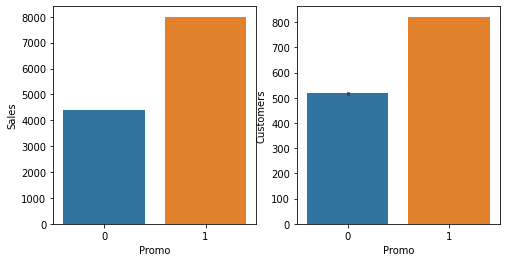

In [124]:
# Let's see relation between sales and promo using a bar plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(x="Promo", y="Sales", data=rossmann_store_df)
# the same plot between customers and promo
plt.subplot(1,2,2)
sns.barplot(x="Promo", y="Customers", data=rossmann_store_df)

Here we can see that both **Sales and Customers** increases by a significant amount during **Promotions**. This shows that Promotion has a **positive** effect for a store.

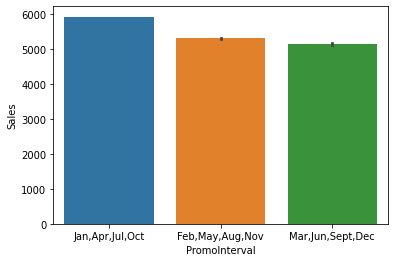

In [125]:
sns.barplot(x="PromoInterval", y="Sales", data=rossmann_store_df)

There were more promotions in the interval of **january,April,July,October** than others

#### State holiday and School Holiday

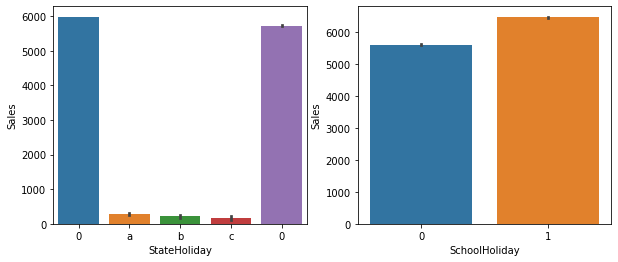

In [126]:
# A plot between sales and both state holiday and school holiday
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x="StateHoliday", y="Sales", data=rossmann_store_df)
plt.subplot(1,2,2)
sns.barplot(x="SchoolHoliday", y="Sales", data=rossmann_store_df)

We can evidently see that **most** of the stores remain **closed** during **State Holidays**. But it's interesting to note that the number of stores opened during **School Holidays** were **more** than the stores opened during State Holidays.

One more important thing is to note that the stores which were opened during **School holidays** had **more sales** than the others.

#### Customers

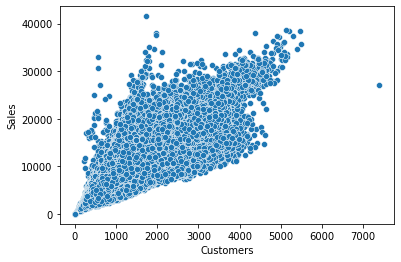

In [127]:
#scatterplot of Customers and Sales
sns.scatterplot(x=rossmann_store_df['Customers'], y=rossmann_store_df['Sales'])

Relation between Sales and Customers shows a direct positive relation between them with a few outliers.

#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

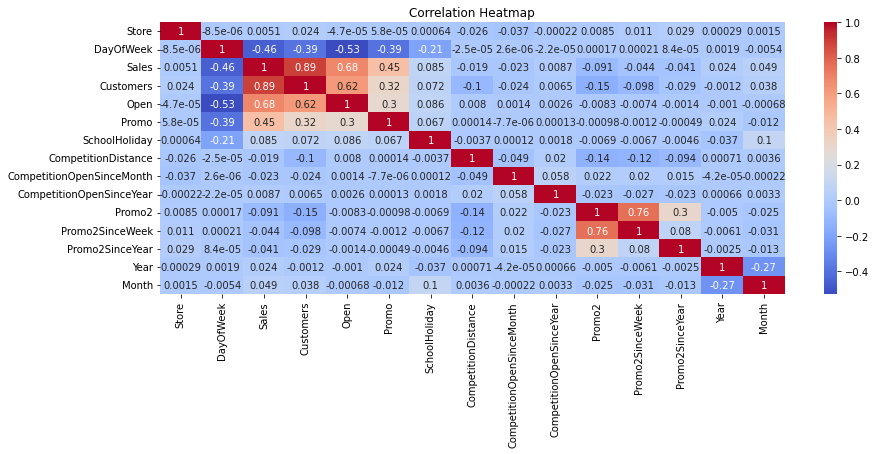

In [128]:
# finding the correlation in the dataset 
plt.figure(figsize=(14,5))
sns.heatmap(rossmann_store_df.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

There's **multicollinearity** in the dataset. The features telling the same story like **Promo2, Promo2SinceWeek and Promo2SinceYear** are showing multicollinearity.


### Conclusions From EDA

* The most **selling** and **crowded** store type is **a**.

* Sales is **highly correlated** to number of **Customers**.

* For all stores,**Promotion** leads to **increase** in **Sales and Customers** both.
* The stores which were **opened** during **School Holiday** had **more sales** than normal days.
* **Most** of the stores were **opened** during School holidays than State holidays.
* Sales were **high** during **Chirstmas**, this might be due to the fact that people buy more during a Christmas celebration.
* There was an **exponential growth** in competetion after the year **2000**.
* There is **multicollinearity** among Promo2, Promo2SinceWeek and Promo2SinceYear
* Only store type **b** had all kind of **assortments**.

## Feature Engineering

In [380]:
# Create a copy of th dataset to be on a safer side
df = rossmann_store_df.copy()

#### Transforming the features to new features

In [381]:
#combining competition open since month and year into total months
df['CompetitionOpen'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [382]:
# Extracting a week column from date
df['WeekOfYear'] = df['Date'].dt.weekofyear

# Combining promo open since year and week into total months
df['Promo2Open'] = (df['Year'] - df['Promo2SinceYear'])*12 + round((df['WeekOfYear'] - df['Promo2SinceWeek'])*0.230137,0)

# Correcting the neg values
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df['Promo2']
df['Promo2Open'] = df['Promo2Open'].astype(int)

# Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2SinceWeek','WeekOfYear','Year','Store'],axis=1,inplace=True)

#setting date as index
df.set_index(['Date'],inplace=True)

#sorting index following the time series
df.sort_index(inplace=True)

In [383]:
df.tail()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,CompetitionOpen,Promo2Open
Date,,,,,,,,,,,,,,,
2015-07-31,5,9082,638,1,1,0,1,d,c,4330.0,1,"Mar,Jun,Sept,Dec",7,53,47
2015-07-31,5,10708,826,1,1,0,1,c,c,45740.0,0,"Jan,Apr,Jul,Oct",7,83,0
2015-07-31,5,7481,578,1,1,0,1,d,a,2380.0,1,"Jan,Apr,Jul,Oct",7,64,52
2015-07-31,5,10460,1016,1,1,0,1,d,c,4380.0,0,"Jan,Apr,Jul,Oct",7,22,0
2015-07-31,5,5263,555,1,1,0,1,c,a,1270.0,0,"Jan,Apr,Jul,Oct",7,82,0


### Multicollinearity

In [384]:
# A function to calculate variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [385]:
vif_cal(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,DayOfWeek,3.210294
1,Customers,5.077895
2,Open,7.964171
3,Promo,1.882488
4,SchoolHoliday,1.253609
5,CompetitionDistance,1.529678
6,Promo2,3.832206
7,Month,3.715468
8,CompetitionOpen,1.462095
9,Promo2Open,2.811557


Multicolinearity of column **Open** is pretty high so it's better to drop it.

In [386]:
# Removing columns with VIF of more than 5
vif_cal(df[[i for i in df.describe().columns if i not in ['Sales','Open']]])

,variables,VIF
0,DayOfWeek,3.176525
1,Customers,2.660908
2,Promo,1.829599
3,SchoolHoliday,1.245457
4,CompetitionDistance,1.447360
5,Promo2,3.653464
6,Month,3.572370
7,CompetitionOpen,1.450866
8,Promo2Open,2.811399


In [387]:
# Dropping the multicollinear column
df.drop(columns = ['Open'], inplace=True)

In [388]:
df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,CompetitionOpen,Promo2Open
Date,,,,,,,,,,,,,,
2013-01-01,2,0,0,0,a,1,d,c,5350.0,1,"Mar,Jun,Sept,Dec",1,0,7
2013-01-01,2,0,0,0,a,1,d,a,6630.0,0,"Jan,Apr,Jul,Oct",1,0,0
2013-01-01,2,0,0,0,a,1,a,c,2140.0,0,"Jan,Apr,Jul,Oct",1,5,0
2013-01-01,2,0,0,0,a,1,a,c,100.0,1,"Feb,May,Aug,Nov",1,31,32
2013-01-01,2,0,0,0,a,1,a,a,160.0,0,"Jan,Apr,Jul,Oct",1,5,0


#### Transforming the Categorical Features

In [389]:
# Replacing rows with 0 to '0'
df['StateHoliday'].replace({0:'0'},inplace=True)

In [390]:
#changing into boolean because all the state holidays have somehow the same impact on sales
df['StateHoliday'].replace({'0':1, 'a':0, 'b':0,'c':0}, inplace=True)

In [391]:
# Assigning numerical values to Assortment column
df['Assortment'].replace({'a':0,'b':1,'c':2},inplace=True)

In [393]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['StoreType', 'PromoInterval']
#fit encoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
df[encoded_features] = encoder.transform(df[categorical_cols])

# drop original features
df.drop(categorical_cols,axis=1,inplace=True)

In [394]:
df.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,Promo2,Month,CompetitionOpen,Promo2Open,StoreType_a,StoreType_b,StoreType_c,StoreType_d,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Date,,,,,,,,,,,,,,,,,,,
2013-01-01,2,0,0,0,0,1,2,5350.0,1,1,0,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2013-01-01,2,0,0,0,0,1,0,6630.0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2013-01-01,2,0,0,0,0,1,2,2140.0,0,1,5,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-01,2,0,0,0,0,1,2,100.0,1,1,31,32,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-01,2,0,0,0,0,1,0,160.0,0,1,5,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [395]:
df.shape

(1017209, 19)

## Model Training 

In [396]:
# importing Dependencies 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_squared_error as mse, mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [397]:
# Split into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Sales']), df['Sales'], test_size=0.2, random_state = 0)
# Create a standard scaler object
mms = MinMaxScaler()
# Scaling training and testing data
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(813767, 18)
(203442, 18)


In [398]:
def model_evaluation(y_test,y_pred):
  ''' This function evaluates and visualizes various models for regression algorithms'''

  # Plot the test results
  test = y_test.copy()
  df_plot = test.reset_index(level=['Date'])
  df_plot['Week of Year'] = df_plot.Date.dt.weekofyear
  df_plot['Predicted_Sales'] = y_pred.tolist()
  plot = df_plot.groupby('Week of Year')['Sales','Predicted_Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  MAE  = mae(y_test, y_pred)
  print("The Mean Absolute Error for the model is :" , MAE)

  RMSPE = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_pred)),axis=0))
  print("The Root Mean Squared Percentage Error for the model is :" ,RMSPE)

  r2 = r2_score(y_test, y_pred)
  print("The R2 for the model is :" ,r2)

  Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  print("Adjusted R2 for the model is :" ,Adj_r2)

### Linear Regression

In [399]:
# Fitting training data into model
reg = LinearRegression().fit(X_train_mms, y_train)

In [400]:
reg.score(X_train_mms, y_train)

0.8928123328942903

In [401]:
reg.coef_

array([-6.24956578e+02,  5.59956269e+04,  1.11652050e+03,  1.09783453e+03,
        5.11447798e+01,  2.53682678e+02,  1.66552803e+03,  1.03564064e+02,
        2.18154145e+02,  7.60483552e+02,  5.13585386e+02,  3.75859633e+16,
        3.75859633e+16,  3.75859633e+16,  3.75859633e+16,  1.01895933e+15,
        1.01895933e+15,  1.01895933e+15])

In [402]:
reg.intercept_

-3.8604922616396264e+16

In [403]:
y_pred = reg.predict(X_test_mms)
y_pred

array([12776.,  1104.,  5432., ...,  5048.,  3392.,   -88.])

In [404]:
y_pred_train = reg.predict(X_train_mms)
y_pred_train

array([10640.,  4736.,  7808., ...,  -256.,  4992.,  7728.])

The Mean Absolute Error for the model is : 886.6479340549149
The Root Mean Squared Percentage Error for the model is : 1.5133993936674168
The R2 for the model is : 0.8925006983243025
Adjusted R2 for the model is : 0.8924911861873751


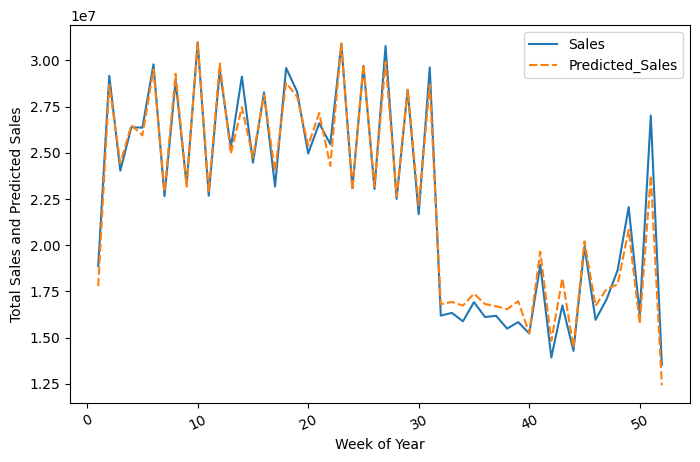

In [405]:
model_evaluation(y_test,y_pred)

### Decision Tree

In [406]:
# create an object of decision tree regressor
decision_tree=DecisionTreeRegressor(max_depth=5)

In [407]:
# Fitting the training data into the model
decision_tree.fit(X_train_mms, y_train)

DecisionTreeRegressor(max_depth=5)

In [408]:
# predict the test data
y_pred_dt = decision_tree.predict(X_test_mms)

The Mean Absolute Error for the model is : 904.9280620620113
The Root Mean Squared Percentage Error for the model is : 0.4477003520329669
The R2 for the model is : 0.8705266467867236
Adjusted R2 for the model is : 0.8705151902633324


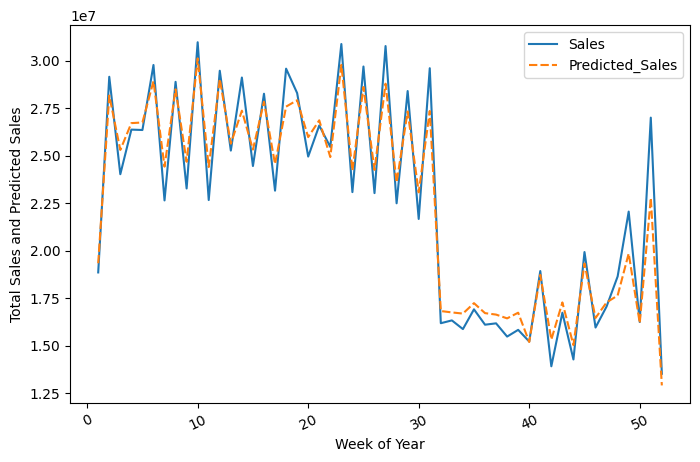

In [409]:
# Evaluation of model
model_evaluation(y_test,y_pred_dt)

### Random Forest

In [410]:
random_forest=RandomForestRegressor(n_estimators =100,max_depth=8)

In [411]:
random_forest.fit(X_train_mms, y_train)

RandomForestRegressor(max_depth=8)

In [412]:
y_pred_rf=random_forest.predict(X_test_mms)

The Mean Absolute Error for the model is : 702.6803838338836
The Root Mean Squared Percentage Error for the model is : 0.1563225246675409
The R2 for the model is : 0.9253386243493443
Adjusted R2 for the model is : 0.9253320178950019


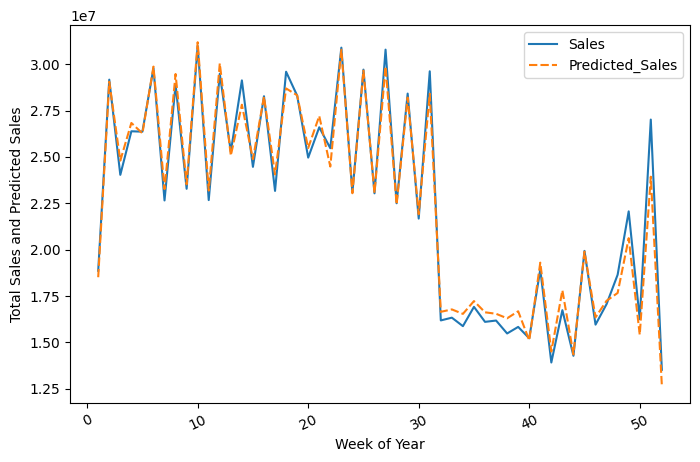

In [413]:
model_evaluation(y_test,y_pred_rf)

### XGBoost Regressor

In [414]:
regressor = XGBRegressor()

In [415]:
regressor.fit(X_train_mms, y_train)

[15:11:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [416]:
y_pred_xg=regressor.predict(X_test_mms)

The Mean Absolute Error for the model is : 668.9864230455527
The Root Mean Squared Percentage Error for the model is : 0.4307464048247908
The R2 for the model is : 0.9366445781901653
Adjusted R2 for the model is : 0.9366389721495869


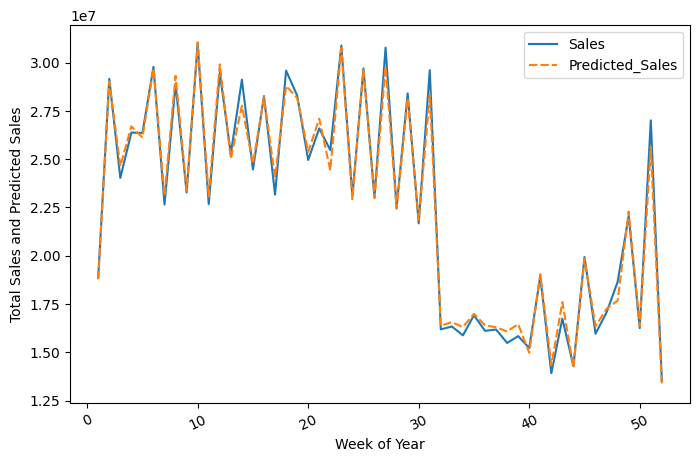

In [417]:
model_evaluation(y_test,y_pred_xg)

### Feature Importance

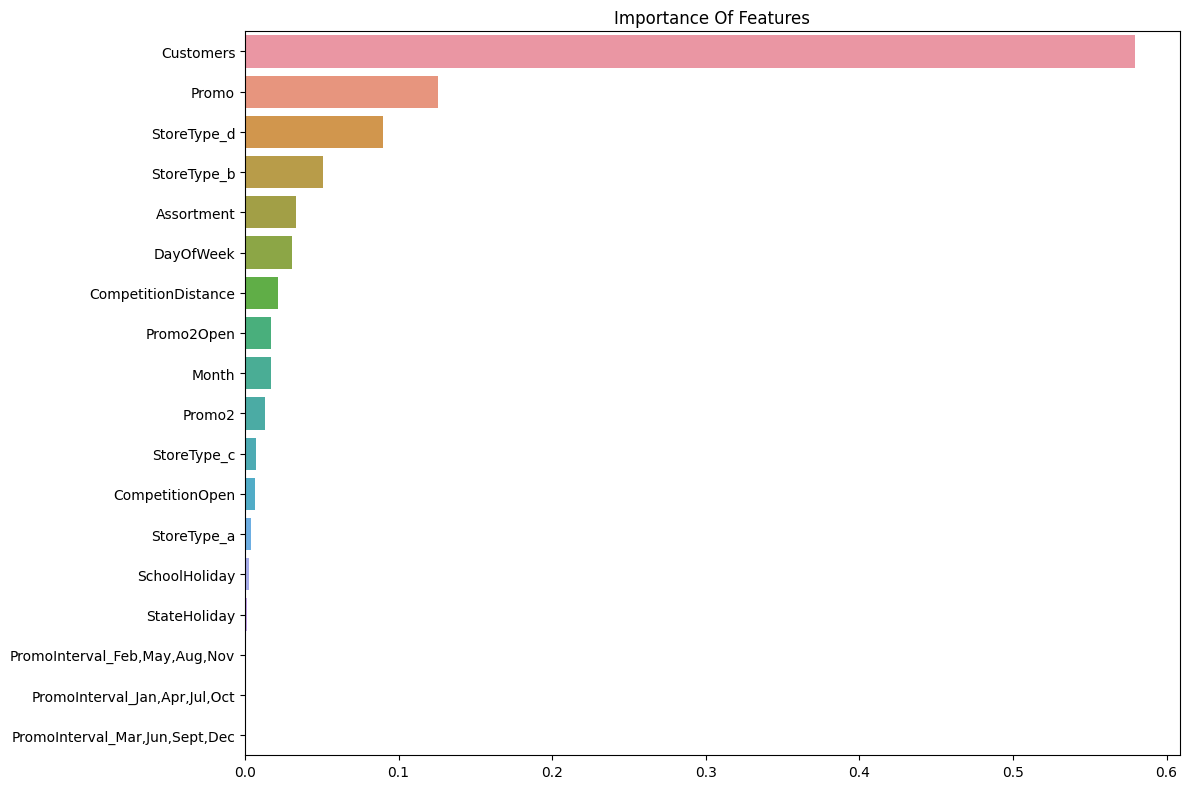

In [418]:
ranks = np.argsort(-regressor.feature_importances_)
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=regressor.feature_importances_[ranks], y=X_train.columns.values[ranks], orient='h')
ax.set_title("Importance Of Features",)
plt.tight_layout()
plt.show()

## Conclusions

* The results of **Random Forest** and **XGBoost Regression** were quite close and better than the Linear Regression model and Decision Tree.

* **Customers,Store type,Promotion,Assortment,Competetion distance** are the most important features of our model.
* We have observed that the **promotions** were offered, may be due to the **increased competetion** around the stores. And these promotions worked very well and attracted more and more customers that lead to **higher sales**.
* **Store type d** was most successful in getting sales as it had all kinds of Assortments.
* The **state** and **school holidays** did not affect the sales much as the stores were closed during holidays.
* Sales were dependent on **days of week** because we know from EDA that sales were **higher on Mondays** as a fact that on Sundays stores remain closed.